# FARGOpy
## Wrapping FRAGO3D

## Tutorial: zoom into the planet

<a target="_blank" href="https://colab.research.google.com/github/seap-udea/fargopy/blob/main/examples/fargopy-tutorial-zoom_in.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

### What's in this notebook

In this notebook we illustrate **how to zoom-into a region surrounding the planet** in `FARGOpy`.

### Before starting

If you are in `Google Colab`, install the latest version of the package:

In [1]:
# @title Install fargopy
import sys
if 'google.colab' in sys.modules:
    !sudo pip install -Uq fargopy

For this tutorial you will need the following external modules and tools:

In [3]:
import fargopy as fp
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

%load_ext autoreload
%autoreload 2

Running FARGOpy version 0.3.6


### Let's `FARGOpy`

First we need the data. Let's download a precomputed simulation:

In [4]:
fp.Simulation.download_precomputed('fargo')

Downloading...
From: https://docs.google.com/uc?export=download&id=1YXLKlf9fCGHgLej2fSOHgStD05uFB2C3
To: /tmp/fargo.tgz
100%|██████████| 54.7M/54.7M [00:02<00:00, 23.2MB/s]


Uncompressing fargo.tgz into /tmp/fargo
Done.


Once download it, we need to connect a `Simulation` with the directory with the simulation results:

In [3]:
sim = fp.Simulation(output_dir='/tmp/fargo')

Your simulation is now connected with '/home/jzuluaga/fargo3d/'
Now you are connected with output directory '/tmp/fargo'
Found a variables.par file in '/tmp/fargo', loading properties
Loading variables
84 variables loaded
Simulation in 2 dimensions
Loading domain in cylindrical coordinates:
	Variable phi: 384 [[0, -3.1334114227210694], [-1, 3.1334114227210694]]
	Variable r: 128 [[0, 0.408203125], [-1, 2.491796875]]
	Variable z: 1 [[0, 0.0], [-1, 0.0]]
Number of snapshots in output directory: 51
Configuration variables and domains load into the object. See e.g. <sim>.vars


Let's load fields at a given snapshot:

In [4]:
snap = 25
gasdens = sim.load_field('gasdens',type='scalar',snapshot=snap)
gasv = sim.load_field('gasv',type='vector',snapshot=snap)
gasvx, gasvy, gasvz = gasv.to_cartesian()

Now I want to make a slice around the planet, 

In [5]:
slice = "z=0,r=[0.8,1.2],phi=[-10 deg,10 deg]"
gasdens_planet,mesh = gasdens.meshslice(slice=slice)

Let's plot the gas density around the planet:

Text(1, 1, 'FARGOpy 0.3.6')

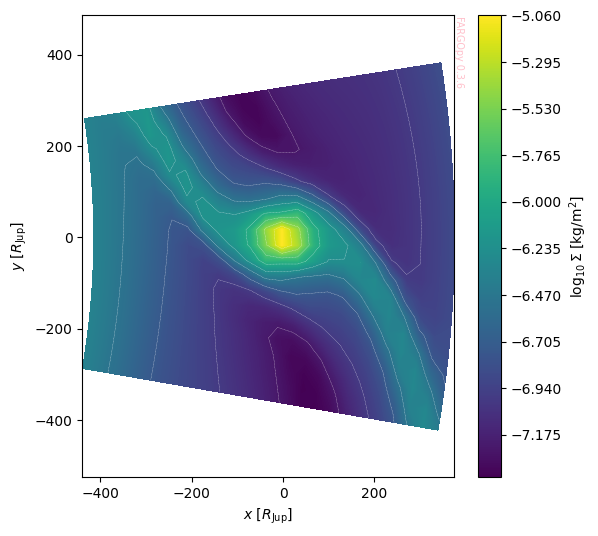

In [6]:
fig,axs = plt.subplots(figsize=(6,6))

# Jupiter radius in cm 
Rjup = 7.1492e9 

# Plot a contour of the gas surface density
cmap = 'viridis'
cf = axs.contourf((mesh.x-1)*sim.UL/Rjup,mesh.y*sim.UL/Rjup,np.log10(gasdens_planet*sim.URHO*1e3),levels=1000,cmap=cmap)
cbar = fig.colorbar(cf)
cbar.set_label("$\log_{10}\Sigma$ [kg/m$^2$]")
axs.contour((mesh.x-1)*sim.UL/Rjup,mesh.y*sim.UL/Rjup,np.log10(gasdens_planet*sim.URHO*1e3),levels=10,colors='w',linewidths=0.2)

# Decorate the plot
axs.set_xlabel("$x$ [$R_\mathrm{Jup}$]")
axs.set_ylabel("$y$ [$R_\mathrm{Jup}$]")
axs.axis('equal')
fp.Plot.fargopy_mark(axs)

Now you can add the velocity vector field. But first we need to slice the cartesian components of the velocity field:

In [7]:
gasvx_planet,mesh = gasvx.meshslice(slice=slice)
gasvy_planet,mesh = gasvy.meshslice(slice=slice)
gasvz_planet,mesh = gasvz.meshslice(slice=slice)

Let's plot it:

Text(1, 1, 'FARGOpy 0.3.6')

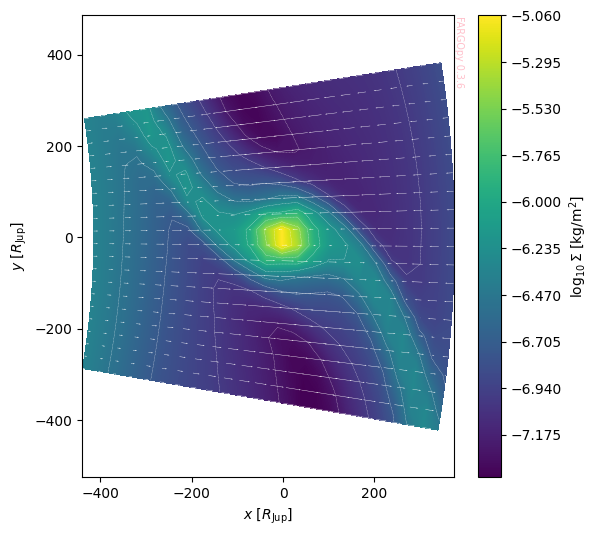

In [8]:
fig,axs = plt.subplots(figsize=(6,6))

# Jupiter radius in cm 
Rjup = 7.1492e9 

# Plot a contour of the gas surface density
cmap = 'viridis'
cf = axs.contourf((mesh.x-1)*sim.UL/Rjup,mesh.y*sim.UL/Rjup,np.log10(gasdens_planet*sim.URHO*1e3),levels=1000,cmap=cmap)
cbar = fig.colorbar(cf)
cbar.set_label("$\log_{10}\Sigma$ [kg/m$^2$]")
axs.contour((mesh.x-1)*sim.UL/Rjup,mesh.y*sim.UL/Rjup,np.log10(gasdens_planet*sim.URHO*1e3),levels=10,colors='w',linewidths=0.2)

# Plot the velocity field
q = axs.quiver((mesh.x-1)*sim.UL/Rjup,mesh.y*sim.UL/Rjup,gasvx_planet,gasvy_planet,scale=2,color='w',width=1e-3)

# Decorate the plot
axs.set_xlabel("$x$ [$R_\mathrm{Jup}$]")
axs.set_ylabel("$y$ [$R_\mathrm{Jup}$]")
axs.axis('equal')
fp.Plot.fargopy_mark(axs)

Let's do the same but for the 3D version of the simulation:

In [10]:
fp.Simulation.download_precomputed('p3disoj')

Downloading...
From: https://docs.google.com/uc?export=download&id=1Xzgk9qatZPNX8mLmB58R9NIi_YQUrHz9
To: /tmp/p3disoj.tgz
100%|██████████| 84.2M/84.2M [00:02<00:00, 35.7MB/s]


Uncompressing p3disoj.tgz into /tmp/p3disoj
Done.


Get the fields and slice them:

In [6]:
# Connect to the simulation results
sim = fp.Simulation(output_dir='/tmp/p3disoj')

# Get fields and slice them
snap = 10
gasdens = sim.load_field('gasdens',type='scalar',snapshot=snap)
gasv = sim.load_field('gasv',snapshot=snap,type='vector')
gasvx, gasvy, gasvz = gasv.to_cartesian()

# Slice them
slice = "itheta=-1,r=[0.7,1.3],phi=[-15 deg,15 deg]"
gasdens_planet,mesh = gasdens.meshslice(slice=slice)
gasvx_planet,mesh = gasvx.meshslice(slice=slice)
gasvy_planet,mesh = gasvy.meshslice(slice=slice)
gasvz_planet,mesh = gasvz.meshslice(slice=slice)


Your simulation is now connected with '/home/jzuluaga/fargo3d/'
Now you are connected with output directory '/tmp/p3disoj'
Found a variables.par file in '/tmp/p3disoj', loading properties
Loading variables
85 variables loaded
Simulation in 3 dimensions
Loading domain in spherical coordinates:
	Variable phi: 128 [[0, -3.117048960983623], [-1, 3.117048960983623]]
	Variable r: 64 [[0, 0.5078125], [-1, 1.4921875]]
	Variable theta: 32 [[0, 1.4231400767948967], [-1, 1.5684525767948965]]
Number of snapshots in output directory: 11
Configuration variables and domains load into the object. See e.g. <sim>.vars


Notice that for slicing in $\theta$ we have used the index of the variable, ie.`itheta`, instead of indicating a value. When using `itheta=-1` we are telling `FARGOpy` to use the last value of the variable in the domain. 

And plot them:

Text(1, 1, 'FARGOpy 0.3.6')

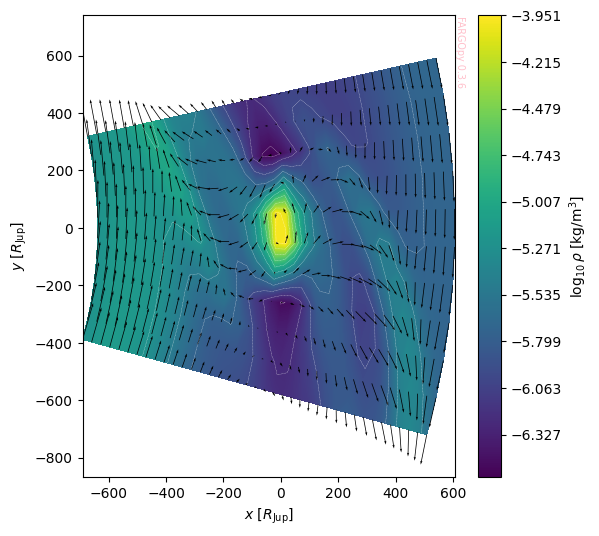

In [7]:
fig,axs = plt.subplots(figsize=(6,6))

# Jupiter radius in cm 
Rjup = 7.1492e9 

# Plot a contour of the gas surface density
cmap = 'viridis'
cf = axs.contourf((mesh.x-1)*sim.UL/Rjup,mesh.y*sim.UL/Rjup,np.log10(gasdens_planet*sim.URHO*1e3),levels=1000,cmap=cmap)
cbar = fig.colorbar(cf)
cbar.set_label(r"$\log_{10}\rho$ [kg/m$^3$]")
axs.contour((mesh.x-1)*sim.UL/Rjup,mesh.y*sim.UL/Rjup,np.log10(gasdens_planet*sim.URHO*1e3),levels=10,colors='w',linewidths=0.2)

# Plot the velocity field
q = axs.quiver((mesh.x-1)*sim.UL/Rjup,mesh.y*sim.UL/Rjup,gasvx_planet,gasvy_planet,scale=5,color='k',width=2e-3)

# Decorate the plot
axs.set_xlabel("$x$ [$R_\mathrm{Jup}$]")
axs.set_ylabel("$y$ [$R_\mathrm{Jup}$]")
axs.axis('equal')
fp.Plot.fargopy_mark(axs)
